In [27]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import torch

In [18]:
model = torch.hub.load('WongKinYiu/yolov7', #repo_name
                       'custom',            #custom model not pretrained
                       'yolov7.pt',         #weights
                       force_reload = False) #if already download not to re-download

Using cache found in C:\Users\user/.cache\torch\hub\WongKinYiu_yolov7_main

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv              

Adding autoShape... 


In [19]:
#grab an image
img = cv2.imread("test_1.jpg")

#cv2 color BGR => RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [25]:
#run the model on image
result = model(img_rgb)

#prints text result
result.print()

#result => 1)bounding box 2)class label 3)confidence score 4)i/p img
#render => img with bounding box + label+ confidence 
#[0] => first image in a list 
result_img = result.render()[0]

image 1/1: 408x612 10 persons
Speed: 11.4ms pre-process, 2461.9ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


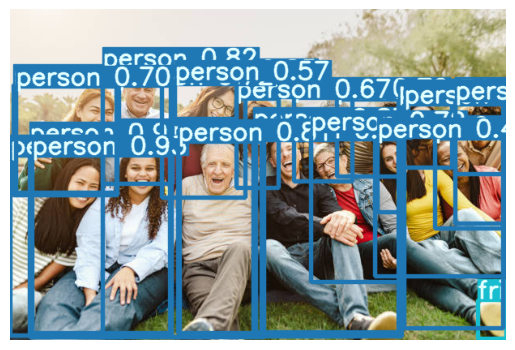

In [28]:
plt.imshow(result_img)
plt.axis("off")
plt.show()

# MULTIPLE IMAGES DETECTION

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import torch

In [30]:
model = torch.hub.load('WongKinYiu/yolov7','custom','yolov7.pt', force_reload = False)

Using cache found in C:\Users\user/.cache\torch\hub\WongKinYiu_yolov7_main

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv              

Adding autoShape... 


YOLOR  2025-7-3 torch 1.13.1+cpu CPU



In [31]:
img_list = ['test_1.jpg','test_2.png','test_3.jpg','test_4.jpg']

In [44]:
rgb_img_list = [cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB) for img in img_list]

In [52]:
result = model(rgb_img_list)
result.print()

image 1/4: 408x612 9 persons
image 2/4: 1130x800 3 birds, 2 cats, 2 dogs, 1 horse, 2 sheeps, 1 cow, 1 elephant
image 3/4: 408x612 3 persons, 3 trains
image 4/4: 157x322 8 cars, 1 traffic light
Speed: 8.4ms pre-process, 3458.9ms inference, 3.9ms NMS per image at shape (4, 3, 640, 640)


In [62]:
#must replace each image with a writable copy to avoid OpenCV errors during rendering
for i in range(len(result.imgs)):
    result.imgs[i] = result.imgs[i].copy()  # create a writable copye
    
# draws detected boxes directly on the images 
render_img = result.render()

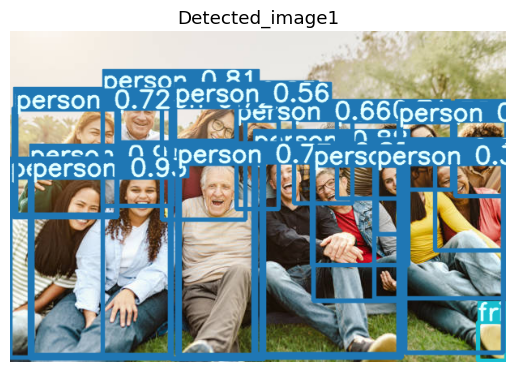

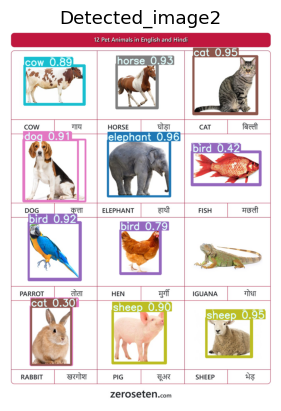

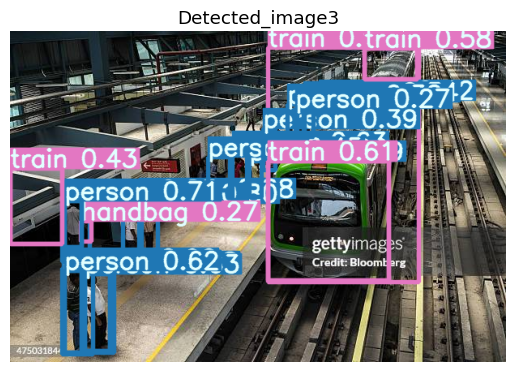

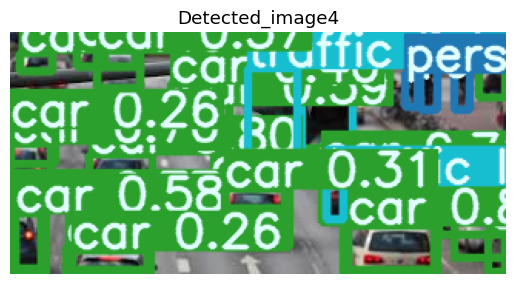

Saved!


In [67]:
for i, image in enumerate(render_img):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Detected_image{i+1}")
    plt.show()

    img_bgr = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"detected_output_{i+1}.jpg", img_bgr)
print("Saved!")